In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab
import scipy
import statsmodels.stats.multitest as smm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/marusy/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data = pd.read_csv('ab_browser_test.csv')

In [4]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [5]:
clicks_exp = data.n_clicks[data.slot == 'exp'].as_matrix()
clicks_control = data.n_clicks[data.slot == 'control'].as_matrix()
n_clicks_exp = data.n_clicks[data.slot == 'exp'].sum()
n_clicks_control = data.n_clicks[data.slot == 'control'].sum()

In [10]:
100*(float(n_clicks_exp)/float(n_clicks_control) - 1.)

1.6135689824415822

In [11]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [57]:
bt2_clicks_exp = get_bootstrap_samples(clicks_exp, 5)
bt2_clicks_control = get_bootstrap_samples(clicks_control, 5)

In [58]:
from statsmodels.stats.weightstats import *

In [59]:
zconfint(bt2_clicks_exp.mean(axis = 1))

(11.543722953404629, 11.585728001918902)

In [60]:
zconfint(bt2_clicks_control.mean(axis = 1))

(11.232551346540456, 11.284572292557923)

(array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
 array([ 3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5]),
 <a list of 10 Patch objects>)

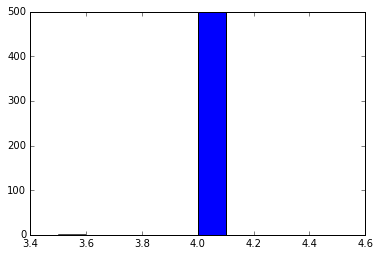

In [61]:
pylab.hist(np.median(bt_clicks_control,axis = 1))

In [53]:
n_boot_samples = 500


In [72]:
np.random.seed(0)
bt_clicks_control = get_bootstrap_samples(clicks_control, n_boot_samples)

In [73]:
control_boot_chi_squared = np.array([bt_clicks_control.mean(axis = 1), bt_clicks_control.std(axis = 1)])

((array([ -2.99209858e+00,  -2.71015927e+00,  -2.55162541e+00,
          -2.43921385e+00,  -2.35113311e+00,  -2.27822091e+00,
          -2.21572267e+00,  -2.16084152e+00,  -2.11178767e+00,
          -2.06734403e+00,  -2.02664403e+00,  -1.98904794e+00,
          -1.95406954e+00,  -1.92133033e+00,  -1.89052965e+00,
          -1.86142459e+00,  -1.83381593e+00,  -1.80753820e+00,
          -1.78245240e+00,  -1.75844061e+00,  -1.73540186e+00,
          -1.71324904e+00,  -1.69190643e+00,  -1.67130780e+00,
          -1.65139483e+00,  -1.63211595e+00,  -1.61342528e+00,
          -1.59528183e+00,  -1.57764883e+00,  -1.56049314e+00,
          -1.54378481e+00,  -1.52749667e+00,  -1.51160399e+00,
          -1.49608418e+00,  -1.48091659e+00,  -1.46608224e+00,
          -1.45156367e+00,  -1.43734479e+00,  -1.42341071e+00,
          -1.40974764e+00,  -1.39634279e+00,  -1.38318426e+00,
          -1.37026095e+00,  -1.35756253e+00,  -1.34507932e+00,
          -1.33280226e+00,  -1.32072287e+00,  -1.308833

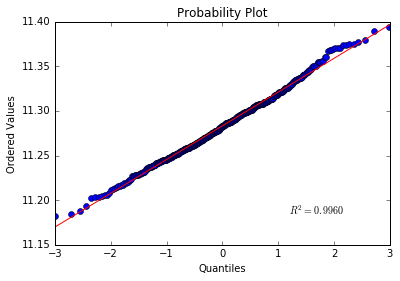

In [74]:
scipy.stats.probplot(control_boot_chi_squared[0], dist='norm', plot = pylab)

((array([ 409.75447609,  417.6076492 ,  422.06789456,  425.24996033,
          427.75458277,  429.83540071,  431.6244473 ,  433.19958802,
          434.61075771,  435.89197548,  437.06750372,  438.15527962,
          439.16895419,  440.11916758,  441.0143809 ,  441.86143812,
          442.66595697,  443.43260794,  444.16531782,  444.86742108,
          445.54177438,  446.19084464,  446.81677748,  447.42145127,
          448.00652022,  448.57344901,  449.12354099,  449.6579613 ,
          450.17775596,  450.68386771,  451.17714938,  451.65837504,
          452.12824958,  452.58741674,  453.03646615,  453.47593922,
          453.90633437,  454.32811152,  454.74169597,  455.14748186,
          455.54583518,  455.93709642,  456.3215829 ,  456.69959087,
          457.07139736,  457.43726183,  457.79742761,  458.1521233 ,
          458.50156388,  458.84595184,  459.1854781 ,  459.52032292,
          459.85065667,  460.17664058,  460.49842735,  460.81616179,
          461.12998133,  461.44001

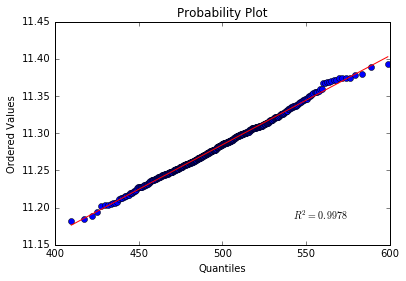

In [75]:
scipy.stats.probplot(control_boot_chi_squared[0], dist='chi2', sparams=n_boot_samples-1, plot = pylab)

In [116]:
users = np.unique(data.userID.as_matrix())
users

array([     1,      3,      5, ..., 603135, 603136, 603137])

In [ ]:
click_user_control = []
click_user_exp = []
users = np.unique(data.userID.as_matrix())
dc = data[data.slot == 'control'].copy()
de = data[data.slot == 'exp'].copy()
for i in users:
    click_user_control.append(dc[dc.userID == i].n_clicks.sum())
    click_user_exp.append(de[de.userID == i].n_clicks.sum())
    if(i%10000 == 0):
        print ('%d done')%i


In [76]:
scipy.stats.mannwhitneyu(clicks_exp, clicks_control)

MannwhitneyuResult(statistic=41184125116.0, pvalue=2.2563433887431387e-74)

In [78]:
browsers = np.unique(data.browser.as_matrix())

In [79]:
n_c_b_exp = data[data.slot == 'exp'][['browser', 'n_clicks']]
n_c_b_control = data[data.slot == 'control'][['browser', 'n_clicks']]

In [94]:
browsers_click_control = []
for i in browsers:
    browsers_click_control.append(n_c_b_control[n_c_b_control['browser'] == i].n_clicks.as_matrix())

browsers_click_exp = []
for i in browsers:
    browsers_click_exp.append(n_c_b_exp[n_c_b_exp['browser'] == i].n_clicks.as_matrix())



In [104]:
browsers

array(['Browser #14', 'Browser #17', 'Browser #2', 'Browser #20',
       'Browser #22', 'Browser #4'], dtype=object)

In [98]:
p_browsers = []
for i,j in zip(browsers_click_control, browsers_click_exp):
    p_browsers.append(scipy.stats.mannwhitneyu(i, j).pvalue)

In [99]:
p_browsers

[0.0,
 0.075379905635521299,
 0.055799789937236381,
 0.90754133162630202,
 0.51616652908421157,
 0.81556888807591688]

In [111]:
reject, p_corrected, a1, a2 = smm.multipletests(p_browsers, 
                                            alpha = 0.05, 
                                            method = 'holm') 

In [113]:
reject

array([ True, False, False, False, False, False], dtype=bool)

In [105]:
n_browser_queries_control = data[data.slot == 'control'][['browser', 'n_queries', 'n_nonclk_queries']]
n_browser_queries_exp = data[data.slot == 'exp'][['browser', 'n_queries', 'n_nonclk_queries']]

In [108]:
nnq_control = []
nnq_exp = []
for i in browsers:
    nnq_control.append(float(n_browser_queries_control[n_browser_queries_control['browser'] == i].n_nonclk_queries.sum())\
                      /float(n_browser_queries_control[n_browser_queries_control['browser'] == i].n_queries.sum()))
    
for i in browsers:
    nnq_exp.append(float(n_browser_queries_exp[n_browser_queries_exp['browser'] == i].n_nonclk_queries.sum())\
                      /float(n_browser_queries_exp[n_browser_queries_exp['browser'] == i].n_queries.sum()))

In [109]:
nnq_control

[0.5759041136008114,
 0.36299366746282086,
 0.4596274717919465,
 0.4054048474338329,
 0.40593976593513353,
 0.4697092963514274]

In [110]:
nnq_exp

[0.4375561736127329,
 0.3693741284866483,
 0.449827469485547,
 0.3897737648371716,
 0.3985394721969546,
 0.4514294190358467]